### generate images and label images for HIOS TDS manuscript

### figS5
* simulation in figS5_kin-simu-ABC-AB-stacking.ipynb
* load pickle file from simulation
* create figure

Package versions:<br>
python==3.10.8<br>
numpy==1.23.5<br>
matplotlib==3.6.2<br>
ipywidgets==8.0.4<br>
matplotlib_scalebar==0.8.1<br>
pickleshare==0.7.5<br>
ase==3.22.1

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import math
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from datetime import datetime
import pickle

import ase, ase.io
from ase.visualize.plot import plot_atoms
#from ase.visualize import view

In [3]:
figsize_w = 15/2.54
fontsize = 12
dpi = 640

In [4]:
with open(r'..\data\Figure S5\20230630_140529simulation_Au-dummy_fcc-ABC_hcp-AB.pkl', 'rb') as f:
    data = pickle.load(f)
for i in list(data.keys()):
    exec(i + '= ' + '(data[i])')

In [5]:
data.keys()

dict_keys(['pattern_fcc_ABC_data', 'pattern_hcp_AB_data', 'thickness', 'EHT', 'file_cif_fcc_ABC', 'file_cif_hcp_AB'])

In [6]:
struc_fcc_ABC = ase.io.read(file_cif_fcc_ABC)
struc_hcp_AB = ase.io.read(file_cif_hcp_AB)

C:\ProgramData\Miniconda3\envs\base0\lib\site-packages\ase\io\cif.py:401: UserWarning: crystal system 'cubic' is not interpreted for space group Spacegroup(225, setting=1). This may result in wrong setting!
  warnings.warn(
C:\ProgramData\Miniconda3\envs\base0\lib\site-packages\ase\io\cif.py:401: UserWarning: crystal system 'hexagonal' is not interpreted for space group Spacegroup(194, setting=1). This may result in wrong setting!
  warnings.warn(


In [7]:
struc_fcc_ABC.get_cell() 

Cell([14.26, 14.26, 14.26])

In [8]:
struc_fcc_ABC.cell

Cell([14.26, 14.26, 14.26])

In [9]:
#view(struc_hcp_AB)

<AxesSubplot: >

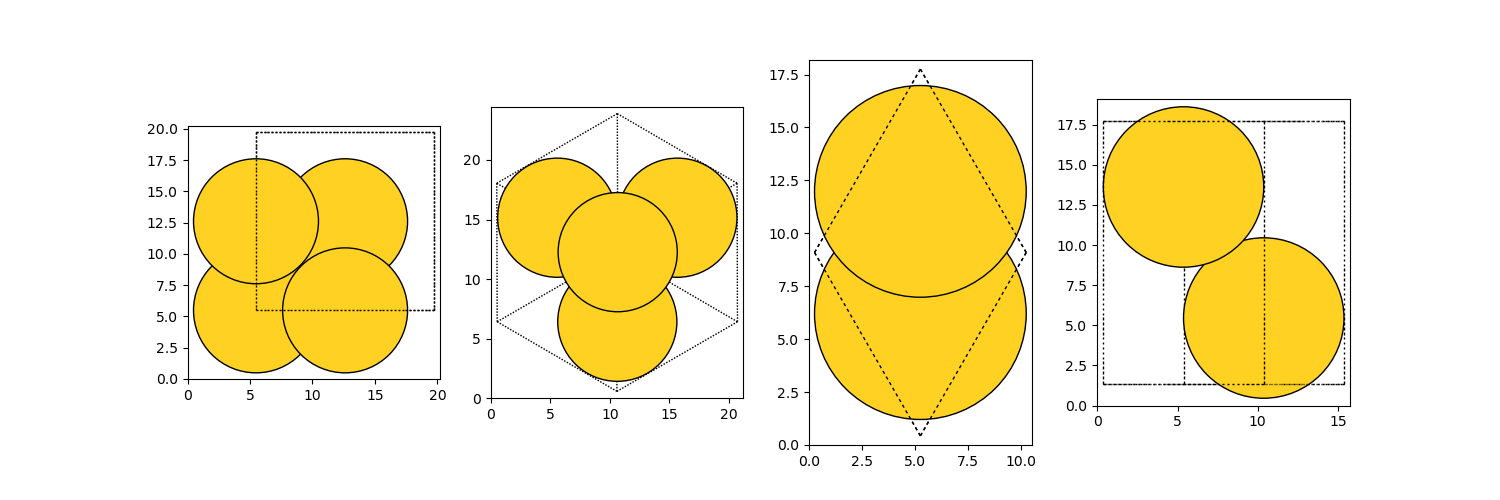

In [10]:
fig, axarr = plt.subplots(1, 4, figsize=(15, 5))
plot_atoms(struc_fcc_ABC, axarr[0], rotation=('0x,0y,0z'),radii = (5,5,5,5))
plot_atoms(struc_fcc_ABC, axarr[1], rotation=('45x,145y,30z'),radii = (5,5,5,5))

plot_atoms(struc_hcp_AB, axarr[2], rotation=('0x,0y,120z'),radii = (5,5))
plot_atoms(struc_hcp_AB, axarr[3], rotation=('90x,0y,0z'),radii = (5,5))

In [11]:
#pattern_hcp_AB_data
#pattern_hcp_AB_data.shape[0]

In [12]:
def rot_2nm(x0 , y0, deg):
    # rotate coordinates
    rad = np.deg2rad(deg)
    x = x0 * math.cos(rad) - y0 * math.sin(rad)
    y = x0 * math.sin(rad) + y0 * math.cos(rad)
    # convert from inv. Angstrom to inv. nm
    x = x * 10
    y = y * 10

    return x, y

In [13]:
pattern_fcc_ABC_data_qx, pattern_fcc_ABC_data_qy = rot_2nm(pattern_fcc_ABC_data['qx'], pattern_fcc_ABC_data['qy'], 3*60)
pattern_hcp_AB_data_qx, pattern_hcp_AB_data_qy = rot_2nm(pattern_hcp_AB_data['qx'], pattern_hcp_AB_data['qy'], 30)

In [14]:
def hkl_bar(val):
    if val < 0:
        #return r'$\bar{' + str(np.abs(val)) + '}$'
        return r'$\overline{' + str(np.abs(val)) + '}$'
    else:
        return str(np.abs(val))

<Axes: label='inset_axes'>

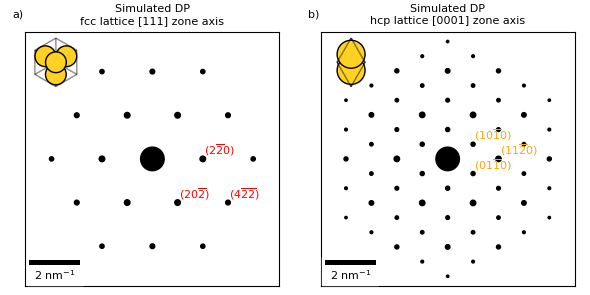

In [15]:
fs1 = 8
fs0 = fs1

str_hkl_dx = 0.05
str_hkl_dy = 0.05

fcc_ABC_hkls = [13,14,-2]
hcp_AB_hkls = [31,39,40]

xlim = 5.
cam_pixel_size = 1
inset_pad = 0.02
xy_pos = (-0.05,1.09)
param1 = {'textcoords': 'axes fraction', 'horizontalalignment': 'left', 'verticalalignment':'top', 'fontsize': fs1,
          'bbox':dict(boxstyle="square,pad=0.0", fc="w", ec="w", lw=2)} #axes points

C60_HKLs_param = {'horizontalalignment':'left', 'verticalalignment': 'bottom', 'fontsize': fs0, 'c':'r'}
C60_hcp_HKLs_param = {'horizontalalignment':'left', 'verticalalignment': 'bottom', 'fontsize': fs0, 'c':'orange'}

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (figsize_w,figsize_w/2), constrained_layout=True)
#gridspec_kw={'height_ratios': [1], 'width_ratios': [img0_ratio,img1_ratio, 1]}, 
# facecolor = 'gray'

im1 = ax1.scatter(pattern_fcc_ABC_data_qy, pattern_fcc_ABC_data_qx, s = (pattern_fcc_ABC_data['intensity'])**(1/2) * 3e2, marker="o", facecolor="k")
#ax1.axis('equal')
ax1.set_xlim(-xlim, xlim)
ax1.set_ylim(-xlim, xlim)
ax1.set_aspect('equal', adjustable='box')
ax1.set_title('Simulated DP\nfcc lattice [111] zone axis', fontsize = fs1)
ax1.tick_params(labelsize=fs0)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.annotate('a)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)


for it in fcc_ABC_hkls:
    #str_hkl = str(pattern_fcc_ABC_data['h'][it]) + str(pattern_fcc_ABC_data['k'][it]) + str(pattern_fcc_ABC_data['l'][it])
    str_hkl = '(' + hkl_bar(pattern_fcc_ABC_data['h'][it]) + hkl_bar(pattern_fcc_ABC_data['k'][it]) + hkl_bar(pattern_fcc_ABC_data['l'][it]) + ')'
    ax1.text(pattern_fcc_ABC_data_qy[it]+str_hkl_dy, pattern_fcc_ABC_data_qx[it]+str_hkl_dx, s = str_hkl, color = 'r', **C60_HKLs_param)

scalebar1 = ScaleBar(cam_pixel_size, '1/nm', dimension="si-length-reciprocal", 
                     location = 'lower left',sep = 2, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
ax1.add_artist(scalebar1)

ax1in = ax1.inset_axes([0.0 + inset_pad,0.8 - inset_pad,0.2,0.2],)    # create new inset axes in data coordinates
ax1in.axis('off')
plot_atoms(struc_fcc_ABC, ax1in, rotation=('45x,145y,30z'), scale = 0.1, radii = (5,5,5,5))
#plot_atoms(struc_hcp_AB, ax1in, rotation=('0x,0y,-60z'))
#axin.imshow(arr_image)

    
    
im2 = ax2.scatter(pattern_hcp_AB_data_qy, pattern_hcp_AB_data_qx, s = (pattern_hcp_AB_data['intensity'])**(1/2) * 3e2, marker="o", facecolor="k")
#ax2.axis('equal')
ax2.set_xlim(-xlim, xlim)
ax2.set_ylim(-xlim, xlim)
ax2.set_aspect('equal', adjustable='box')
ax2.set_title('Simulated DP\nhcp lattice [0001] zone axis', fontsize = fs1)
ax2.tick_params(labelsize=fs0)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.annotate('b)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)


for it in hcp_AB_hkls:
    #str_hkl = str(pattern_fcc_ABC_data['h'][it]) + str(pattern_fcc_ABC_data['k'][it]) + str(pattern_fcc_ABC_data['l'][it])
    #str_hkl = hkl_bar(pattern_hcp_AB_data['h'][it]) + hkl_bar(pattern_hcp_AB_data['k'][it]) + hkl_bar(pattern_hcp_AB_data['l'][it])
    str_hkl = '(' + hkl_bar(pattern_hcp_AB_data['h'][it]) + hkl_bar(pattern_hcp_AB_data['k'][it]) + hkl_bar(-pattern_hcp_AB_data['h'][it] -pattern_hcp_AB_data['k'][it]) + hkl_bar(pattern_hcp_AB_data['l'][it]) + ')'
    ax2.text(pattern_hcp_AB_data_qy[it]+str_hkl_dy, pattern_hcp_AB_data_qx[it]+str_hkl_dx, s = str_hkl, color = 'r', **C60_hcp_HKLs_param)

scalebar2 = ScaleBar(cam_pixel_size, '1/nm', dimension="si-length-reciprocal", 
                     location = 'lower left',sep = 2, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
ax2.add_artist(scalebar2)

ax2in = ax2.inset_axes([0.0 + inset_pad,0.8 - inset_pad,0.2,0.2],)    # create new inset axes in data coordinates
ax2in.axis('off')
plot_atoms(struc_hcp_AB, ax2in, rotation=('0x,0y,120z'), scale = 0.1, radii = (5,5))

In [16]:
date_str = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig('figS5_' + date_str + '.png', dpi = dpi, bbox_inches = "tight")